# Main For Part 1

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import numpy as np
from matplotlib import pyplot as plt
# Needed for training
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import random_split, DataLoader
from torch.utils.data.dataset import Subset
# Models
from models_part1 import FinalClassifier , MNISTAutoencoder, CIFAR10Autoencoder
from models_testing import  plot_accuracies,plot_losses,test_classifier,test_classifyingAutoEncoder
from models_testing import create_model_folders,PretrainedModel,save_pretrained_model
%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
base_path = 'trained_models/part_1/'

# MNIST

# Preparing Data

In [6]:
mnist_path = "./mnist_data"

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = torchvision.datasets.MNIST(
    root=mnist_path,  
    train=True,       
    transform=transform,  # Apply transformations here
    download=True     
)

test_dataset = torchvision.datasets.MNIST(
    root=mnist_path,
    train=False,  
    transform=transform,  # Apply same transformations for test data
    download=True
)

print("MNIST dataset downloaded successfully!")

MNIST dataset downloaded successfully!


In [7]:
train_size = 50_000
val_size = 10_000

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

print(f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}")


batch_size = 64

# Create DataLoaders
mnist_train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
mnist_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
mnist_test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created successfully!")

images, labels = next(iter(mnist_train_loader))
print(f"Batch shape: {images.shape}, Labels: {labels[:5]}")

Train size: 50000, Validation size: 10000, Test size: 10000
DataLoaders created successfully!
Batch shape: torch.Size([64, 1, 28, 28]), Labels: tensor([1, 6, 6, 0, 8])


# Experiment

In [8]:
# Model initialization
model = MNISTAutoencoder(latent_dim=128).to(device)

train_losses,val_losses = model.train_autoencoder(train_loader= mnist_train_loader,
                       val_loader=mnist_val_loader,
                       num_epochs=40,
                       learning_rate=1e-3,
                       weight_decay= 1e-3)

Epoch [1/40], Time: 19.49s, Train Loss: 0.0989, Val Loss: 0.0362, LR: 0.0010000
Epoch [2/40], Time: 10.74s, Train Loss: 0.0432, Val Loss: 0.0313, LR: 0.0010000
Epoch [3/40], Time: 11.24s, Train Loss: 0.0398, Val Loss: 0.0291, LR: 0.0010000
Epoch [4/40], Time: 10.78s, Train Loss: 0.0381, Val Loss: 0.0280, LR: 0.0010000
Epoch [5/40], Time: 10.28s, Train Loss: 0.0371, Val Loss: 0.0271, LR: 0.0010000
Epoch [6/40], Time: 9.98s, Train Loss: 0.0362, Val Loss: 0.0261, LR: 0.0010000
Epoch [7/40], Time: 10.42s, Train Loss: 0.0354, Val Loss: 0.0256, LR: 0.0010000
Epoch [8/40], Time: 10.12s, Train Loss: 0.0348, Val Loss: 0.0249, LR: 0.0010000
Epoch [9/40], Time: 10.25s, Train Loss: 0.0343, Val Loss: 0.0246, LR: 0.0010000
Epoch [10/40], Time: 10.82s, Train Loss: 0.0339, Val Loss: 0.0241, LR: 0.0010000
Epoch [11/40], Time: 10.24s, Train Loss: 0.0335, Val Loss: 0.0242, LR: 0.0010000
Epoch [12/40], Time: 10.08s, Train Loss: 0.0331, Val Loss: 0.0238, LR: 0.0010000
Epoch [13/40], Time: 10.31s, Train Los

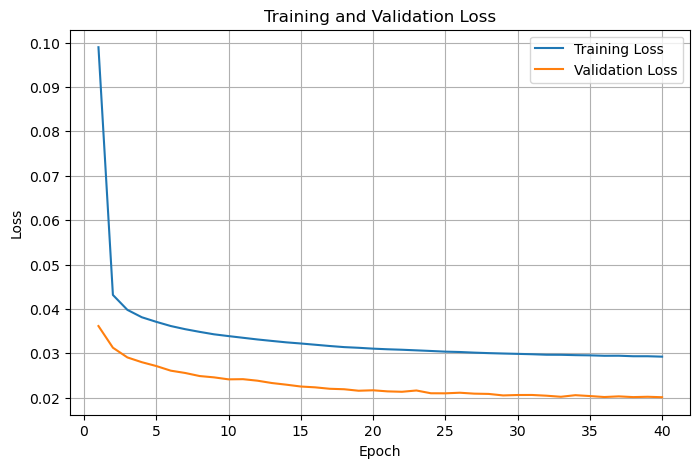

In [9]:
plot_losses(train_losses = train_losses, val_losses = val_losses)

In [10]:
pretrained_encoder = model.encoder
for param in pretrained_encoder.parameters():
    param.requires_grad = False  # Ensure encoder is frozen
classifier = FinalClassifier(latent_dim=128)
train_losses, train_accuracies, val_accuracies = classifier.fit_classifier(encoder = pretrained_encoder,
                                                                           train_loader =  mnist_train_loader,
                                                                           val_loader = mnist_val_loader,
                                                                           num_epochs=30, 
                                                                           learning_rate=1e-3)


Epoch [1/30], Time: 13.08s, Train Loss: 0.2859, Train Accuracy: 91.50%, Val Accuracy: 96.50%, LR: 0.001000
Epoch [2/30], Time: 12.65s, Train Loss: 0.1301, Train Accuracy: 96.05%, Val Accuracy: 97.08%, LR: 0.001000
Epoch [3/30], Time: 12.74s, Train Loss: 0.0926, Train Accuracy: 97.09%, Val Accuracy: 97.67%, LR: 0.001000
Epoch [4/30], Time: 12.37s, Train Loss: 0.0768, Train Accuracy: 97.51%, Val Accuracy: 97.52%, LR: 0.001000
Epoch [5/30], Time: 13.31s, Train Loss: 0.0681, Train Accuracy: 97.76%, Val Accuracy: 97.85%, LR: 0.001000
Epoch [6/30], Time: 13.29s, Train Loss: 0.0568, Train Accuracy: 98.12%, Val Accuracy: 97.77%, LR: 0.001000
Epoch [7/30], Time: 13.28s, Train Loss: 0.0512, Train Accuracy: 98.31%, Val Accuracy: 97.80%, LR: 0.001000
Epoch [8/30], Time: 12.20s, Train Loss: 0.0447, Train Accuracy: 98.51%, Val Accuracy: 97.91%, LR: 0.001000
Epoch [9/30], Time: 12.22s, Train Loss: 0.0438, Train Accuracy: 98.53%, Val Accuracy: 97.94%, LR: 0.001000
Epoch [10/30], Time: 12.18s, Train Lo

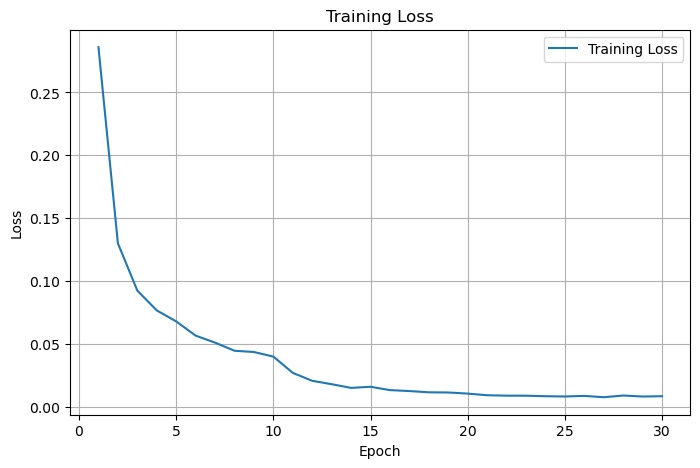

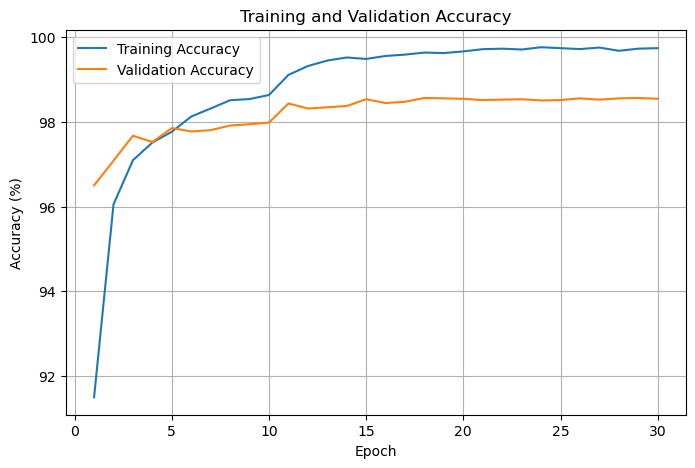

In [11]:
plot_losses(train_losses)
plot_accuracies(train_accuracies, val_accuracies)

In [12]:
test_classifier(encoder=pretrained_encoder,
                classifier=classifier,
                test_loader=mnist_test_loader)

Test Accuracy: 98.55%


## Save model

In [14]:
save_pretrained_model(path = base_path + 'mnist.pth',
                      encoder = model.encoder,
                      classifier = classifier,
                      decoder = model.decoder)

# Cifar10

# Preparing data

In [5]:
cifar10_path = "./cifar10_data"

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

c10_full_train_dataset = torchvision.datasets.CIFAR10(
    root=cifar10_path,  
    train=True,       
    transform=transform,
    download=True     
)

c10_test_dataset = torchvision.datasets.CIFAR10(
    root=cifar10_path,
    train=False,  
    transform=transform,
    download=True
)

print("CIFAR-10 dataset downloaded successfully!")

Files already downloaded and verified
Files already downloaded and verified
CIFAR-10 dataset downloaded successfully!


In [6]:
train_size = 40_000
val_size = 10_000

c10_train_dataset, c10_val_dataset = random_split(c10_full_train_dataset, [train_size, val_size])

# Check dataset sizes
print(f"Train size: {len(c10_train_dataset)}, Validation size: {len(c10_val_dataset)}, Test size: {len(c10_test_dataset)}")

# Define batch size
batch_size = 64

# Create DataLoaders
c10_train_loader = DataLoader(c10_train_dataset, batch_size=batch_size, shuffle=True)
c10_val_loader = DataLoader(c10_val_dataset, batch_size=batch_size, shuffle=False)
c10_test_loader = DataLoader(c10_test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created successfully!")

# Get a batch of images and labels from the train_loader
images, labels = next(iter(c10_train_loader))
print(f"Batch shape: {images.shape}, Labels (first 5): {labels[:5]}")

Train size: 40000, Validation size: 10000, Test size: 10000
DataLoaders created successfully!
Batch shape: torch.Size([64, 3, 32, 32]), Labels (first 5): tensor([1, 3, 6, 9, 5])


# Experiment

In [7]:
model = CIFAR10Autoencoder(latent_dim=128).to(device)
train_losses,val_losses = model.train_autoencoder(train_loader = c10_train_loader,
                        val_loader = c10_val_loader,
                        num_epochs=40,
                        learning_rate= 1e-3,
                        weight_decay= 1e-3)

Initializing weights ....
Initializing weights DONE
Epoch [1/40], Time: 22.19s, Train Loss: 0.1767, Val Loss: 0.1382, LR: 0.0010000
Epoch [2/40], Time: 12.99s, Train Loss: 0.1311, Val Loss: 0.1190, LR: 0.0010000
Epoch [3/40], Time: 12.51s, Train Loss: 0.1192, Val Loss: 0.1100, LR: 0.0010000
Epoch [4/40], Time: 11.94s, Train Loss: 0.1124, Val Loss: 0.1070, LR: 0.0010000
Epoch [5/40], Time: 12.98s, Train Loss: 0.1079, Val Loss: 0.1023, LR: 0.0010000
Epoch [6/40], Time: 12.52s, Train Loss: 0.1055, Val Loss: 0.1017, LR: 0.0010000
Epoch [7/40], Time: 11.80s, Train Loss: 0.1031, Val Loss: 0.0996, LR: 0.0010000
Epoch [8/40], Time: 11.97s, Train Loss: 0.1016, Val Loss: 0.0981, LR: 0.0010000
Epoch [9/40], Time: 11.88s, Train Loss: 0.1011, Val Loss: 0.0977, LR: 0.0010000
Epoch [10/40], Time: 12.89s, Train Loss: 0.0998, Val Loss: 0.0964, LR: 0.0010000
Epoch [11/40], Time: 14.56s, Train Loss: 0.0994, Val Loss: 0.0977, LR: 0.0010000
Epoch [12/40], Time: 12.56s, Train Loss: 0.0988, Val Loss: 0.0962,

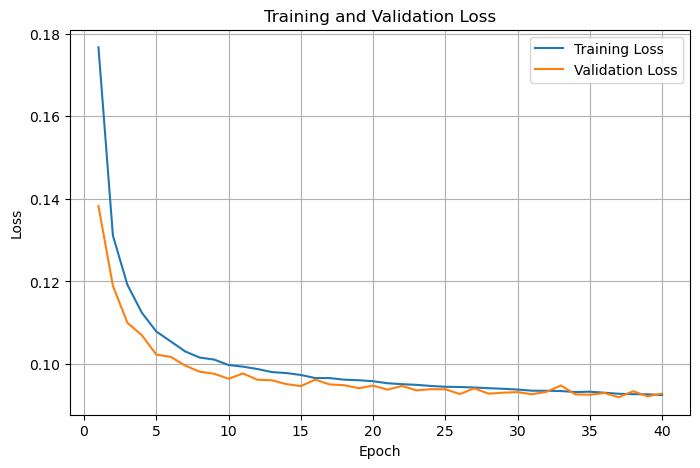

In [8]:
plot_losses(train_losses = train_losses, val_losses = val_losses)

In [9]:
for param in model.encoder.parameters():
    param.requires_grad = False  # Ensure encoder is frozen
pretrained_encoder = model.encoder
classifier = FinalClassifier(latent_dim=128)
train_losses, train_accuracies, val_accuracies = classifier.fit_classifier(encoder = pretrained_encoder,
                                                                           train_loader =  c10_train_loader,
                                                                           val_loader = c10_val_loader,
                                                                           num_epochs=30, 
                                                                           learning_rate=1e-3)

Epoch [1/30], Time: 14.71s, Train Loss: 1.6404, Train Accuracy: 41.34%, Val Accuracy: 47.91%, LR: 0.001000
Epoch [2/30], Time: 14.37s, Train Loss: 1.4224, Train Accuracy: 49.02%, Val Accuracy: 50.90%, LR: 0.001000
Epoch [3/30], Time: 14.43s, Train Loss: 1.3316, Train Accuracy: 52.42%, Val Accuracy: 52.65%, LR: 0.001000
Epoch [4/30], Time: 14.45s, Train Loss: 1.2733, Train Accuracy: 54.40%, Val Accuracy: 54.10%, LR: 0.001000
Epoch [5/30], Time: 14.51s, Train Loss: 1.2203, Train Accuracy: 56.62%, Val Accuracy: 55.11%, LR: 0.001000
Epoch [6/30], Time: 14.42s, Train Loss: 1.1847, Train Accuracy: 57.82%, Val Accuracy: 55.63%, LR: 0.001000
Epoch [7/30], Time: 14.37s, Train Loss: 1.1451, Train Accuracy: 58.95%, Val Accuracy: 55.17%, LR: 0.001000
Epoch [8/30], Time: 14.27s, Train Loss: 1.1170, Train Accuracy: 60.27%, Val Accuracy: 56.19%, LR: 0.001000
Epoch [9/30], Time: 14.34s, Train Loss: 1.0879, Train Accuracy: 61.26%, Val Accuracy: 56.67%, LR: 0.001000
Epoch [10/30], Time: 14.34s, Train Lo

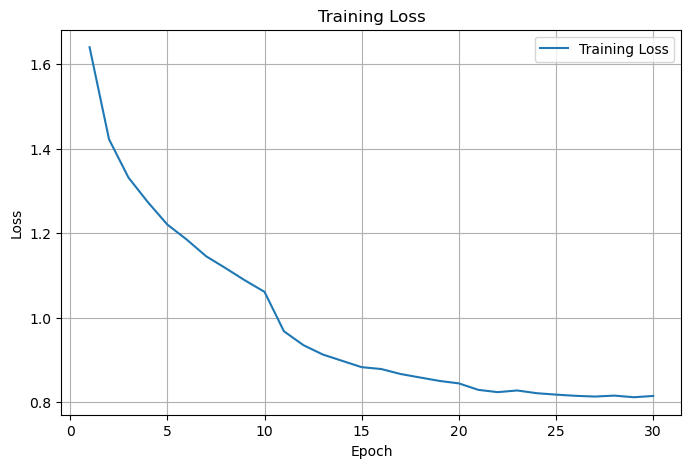

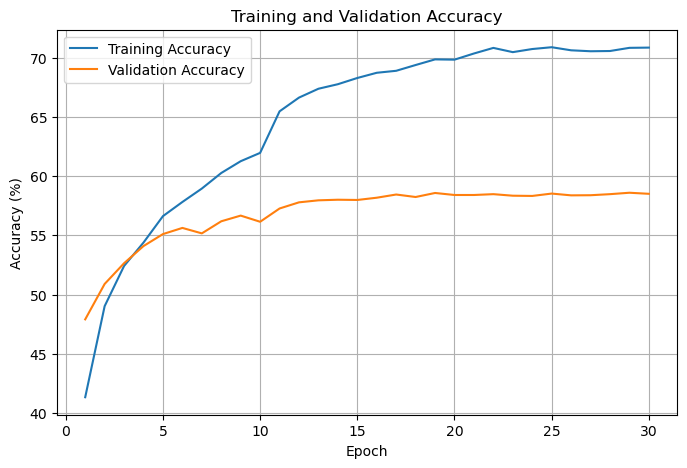

In [10]:
plot_losses(train_losses)
plot_accuracies(train_accuracies, val_accuracies)

In [11]:
test_classifier(encoder=pretrained_encoder,
                classifier=classifier,
                test_loader=c10_test_loader)

Test Accuracy: 58.65%


## Saving model

In [12]:
save_pretrained_model(path = base_path + 'cifar.pth',
                      encoder = model.encoder,
                      classifier = classifier,
                      decoder = model.decoder)